In [1]:
!pip install pulp sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 5.4 MB/s eta 0:00:00


# Statistics & Machine Learning in Automation and Operations

Machne learning is a field of AI that focuses on building systems that learn from data.
The goal is to use data to understand the underlying patterns and make predictions.

In general we can use:

- in a supervised way, where we somehow "know" an answer to a particular question (on trainining questions), for example: we know which engines broke based on their behaviour or we know which images show us defects
- in an unsupervised way, where we have data but we don't nesseesarely know the answers. What we ask the AI to do is to somehow divide the data into meaningfull parterns or try to compress it i.e. find features that describe best our data. For example the model can show how a "healthy machine" behaves on a factory floor and will enable us to distinguish it from a faulty ones
- reinforcement learning is a learning where we give "points/ awards" for a good results not nessesarely focusing on particular behaviours or singular decisions. For example we may train a robot to walk by awarding how far he could get without falling.

# Time series forecasting

Time series forecasting is a type of supervised learning where we use historical data to predict future values.





(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

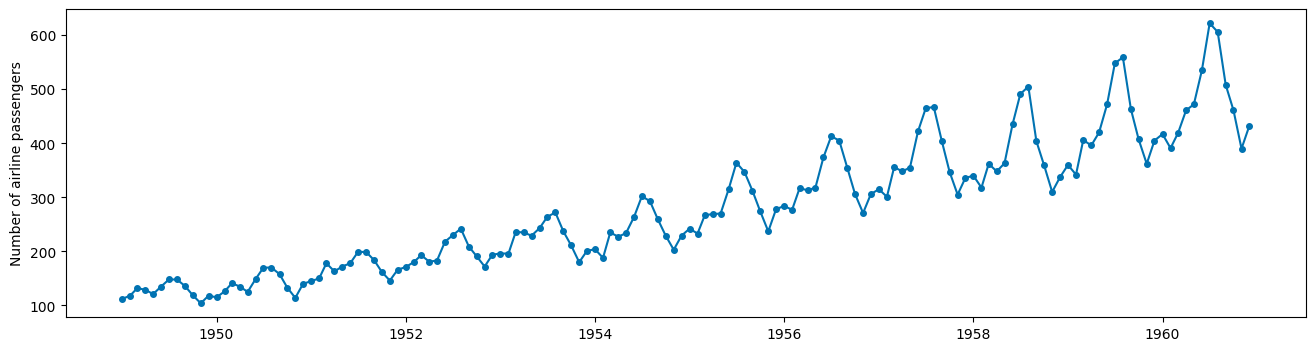

In [4]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
import numpy as np
y = load_airline()

plot_series(y)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

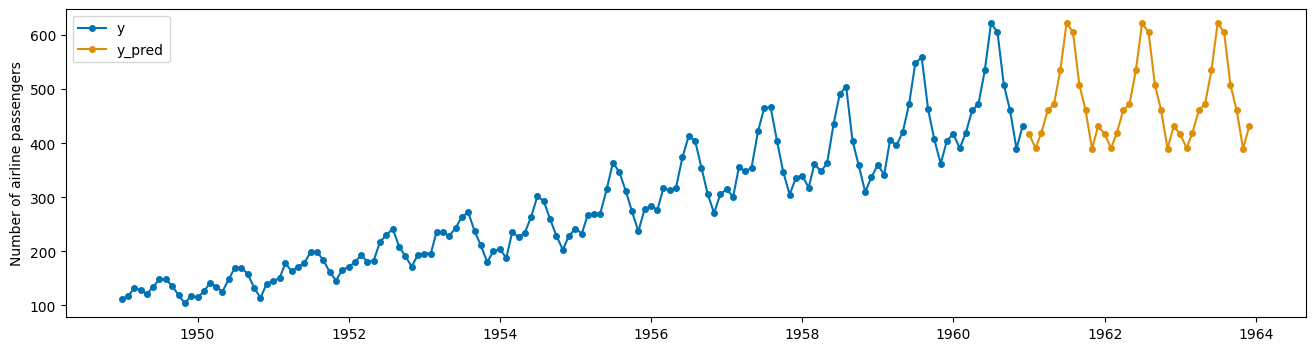

In [5]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)



# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/sktime/forecasting/base/_fh.py:863: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.12/dist-packages/sktime/forecasting/base/_fh.py:877: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

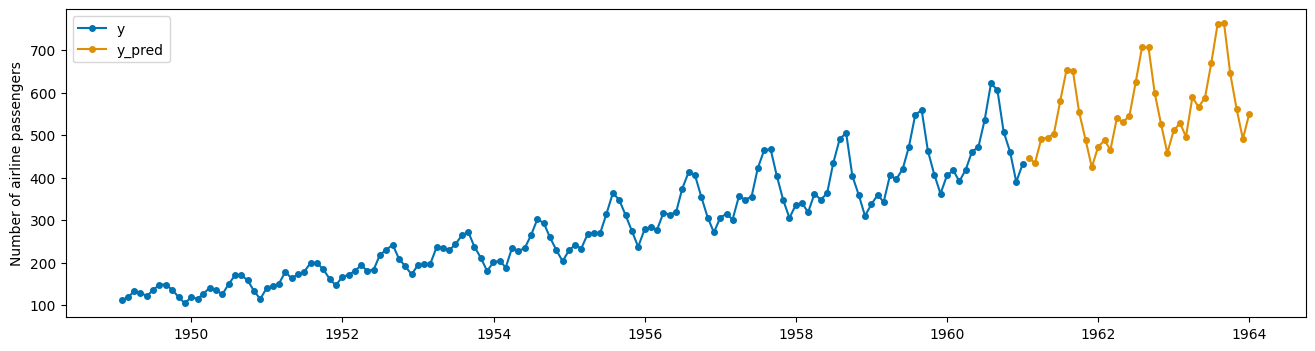

In [6]:
!pip install prophet
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
ym = load_airline().to_timestamp(freq='M')
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(ym)
Prophet(...)
y_predm = forecaster.predict(fh)
plot_series(ym, y_predm, labels=["y", "y_pred"])

# Excercise:
 download the prices of : eggs, chicken, beef, milk from https://fred.stlouisfed.org/categories/32217, other if you want

estimate what is the best blend of products for the cat food problem for june of this year, is it the same for september?


Steps:
- load the data
- plot the data
- try to find a model that forecasts the data well
- make a prediction for june of this year
- make a prediction for september of this year
- use the predictions to put the price of the blend of products on the market
- use a typical linear programming model to find the best blend of products that minimizes the cost of the blend

Dane pobrane pomyślnie.
             Jaja  Kurczak  Wolowina  Mleko
DATE                                       
2025-06-01  3.775    4.239     6.120  4.029
2025-07-01  3.599    4.204     6.254  4.162
2025-08-01  3.587    4.212     6.318  4.171
2025-09-01  3.488    4.172     6.323  4.129
2025-11-01  2.860    4.150     6.540  3.997


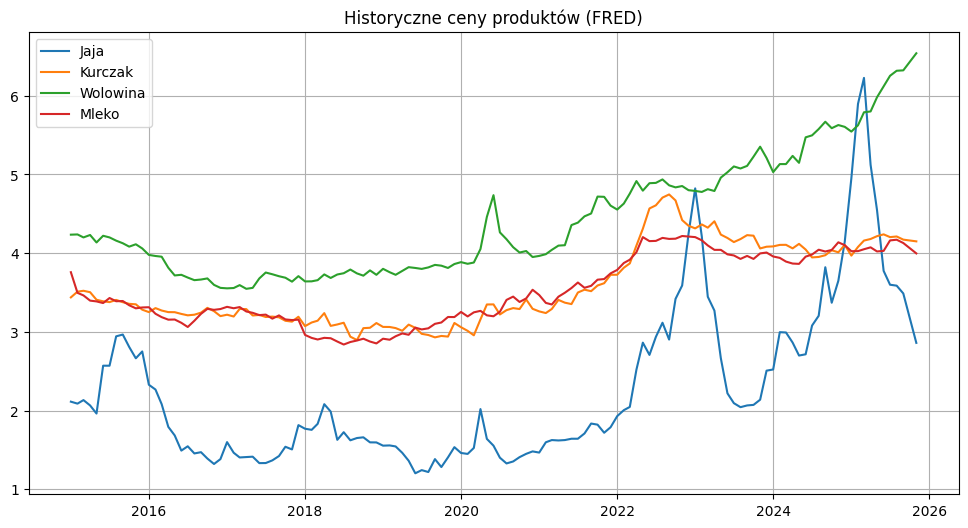


Prognozowanie cen na rok 2025...


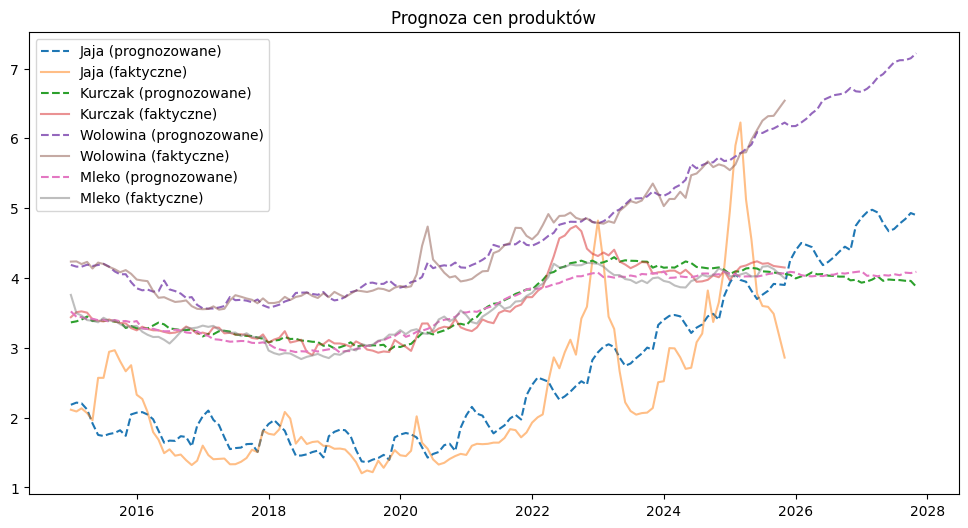


Prognozowane ceny na Czerwiec 2025: {'Jaja': np.float64(3.6987159511029635), 'Kurczak': np.float64(4.13540033127663), 'Wolowina': np.float64(6.089173760740397), 'Mleko': np.float64(4.020198668213727)}
Prognozowane ceny na Wrzesień 2025: {'Jaja': np.float64(3.9154141184158506), 'Kurczak': np.float64(4.079421231350559), 'Wolowina': np.float64(6.141539752036228), 'Mleko': np.float64(4.068225273925163)}

--- Wynik optymalizacji dla: CZERWIEC ---
Minimalny koszt: $9.63
Najlepsza mieszanka:
  Jaja: 0.6505 jedn.
  Kurczak: 0.4466 jedn.
  Wolowina: 0.5534 jedn.
  Mleko: 0.5000 jedn.

--- Wynik optymalizacji dla: WRZESIEŃ ---
Minimalny koszt: $9.80
Najlepsza mieszanka:
  Jaja: 0.6505 jedn.
  Kurczak: 0.4466 jedn.
  Wolowina: 0.5534 jedn.
  Mleko: 0.5000 jedn.

Czy mieszanka jest taka sama w obu miesiącach? TAK


In [12]:
!pip install prophet pandas_datareader scipy

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from prophet import Prophet
from scipy.optimize import linprog

# Jaja: Grade A, Large (Cost per Dozen)
# Kurczak: Breast, Boneless (Cost per Pound)
# Wolowina: Ground Wolowina, 100% Wolowina (Cost per Pound)
# Mleko: Fresh, Whole (Cost per Gallon)
tickers = {
    'Jaja': 'APU0000708111',
    'Kurczak': 'APU0000FF1101',
    'Wolowina': 'APU0000703112',
    'Mleko': 'APU0000709112'
}

start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime.now()

df_prices = pd.DataFrame()

for name, ticker in tickers.items():
    try:
        # Pobieramy dane
        data = web.DataReader(ticker, 'fred', start_date, end_date)
        # Zmieniamy nazwę kolumny na nazwę produktu
        data = data.rename(columns={ticker: name})
        if df_prices.empty:
            df_prices = data
        else:
            df_prices = df_prices.join(data)
    except Exception as e:
        print(f"Error downloading {name}: {e}")

# Usuwamy brakujące dane (jeśli są)
df_prices = df_prices.dropna()
print("Dane pobrane pomyślnie.")
print(df_prices.tail())

plt.figure(figsize=(12, 6))
for col in df_prices.columns:
    plt.plot(df_prices.index, df_prices[col], label=col)
plt.title('Historyczne ceny produktów (FRED)')
plt.legend()
plt.grid(True)
plt.show()

# Funkcja pomocnicza do prognozowania jednej serii
def forecast_price(series, months_ahead=12):
    # Prophet wymaga kolumn 'ds' (data) i 'y' (wartość)
    df_prophet = series.reset_index()
    df_prophet.columns = ['ds', 'y']

    m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
    m.fit(df_prophet)

    future = m.make_future_dataframe(periods=months_ahead, freq='MS') # MS = Month Start
    forecast = m.predict(future)
    return forecast[['ds', 'yhat']]

# Prognozujemy ceny dla każdego produktu
forecasts = {}
target_year = datetime.datetime.now().year
print(f"\nPrognozowanie cen na rok {target_year}...")

plt.figure(figsize=(12, 6))

for product in df_prices.columns:
    fcst = forecast_price(df_prices[product], months_ahead=24) # Prognoza na 2 lata w przód
    forecasts[product] = fcst

    # Rysowanie prognozy
    plt.plot(fcst['ds'], fcst['yhat'], label=f'{product} (prognozowane)', linestyle='--')
    # Rysowanie historii
    plt.plot(df_prices.index, df_prices[product], label=f'{product} (faktyczne)', alpha=0.5)

plt.title('Prognoza cen produktów')
plt.legend()
plt.show()

# Wyciąganie cen na Czerwiec (June) i Wrzesień (September) tego roku
def get_price_for_month(forecast_df, year, month):
    # Szukamy wiersza z danym rokiem i miesiącem
    row = forecast_df[
        (forecast_df['ds'].dt.year == year) &
        (forecast_df['ds'].dt.month == month)
    ]
    if not row.empty:
        return row.iloc[0]['yhat']
    return None

prices_june = {}
prices_sept = {}

for product, fcst in forecasts.items():
    prices_june[product] = get_price_for_month(fcst, target_year, 6)
    prices_sept[product] = get_price_for_month(fcst, target_year, 9)

print(f"\nPrognozowane ceny na Czerwiec {target_year}: {prices_june}")
print(f"Prognozowane ceny na Wrzesień {target_year}: {prices_sept}")


# ==========================================
#            The Cat Food Problem
# ==========================================
# Zmienne decyzyjne: x1=Jaja, x2=Kurczak, x3=Wolowina, x4=Mleko (ilość jednostek)

# Tabela wartości odżywczych:
#                 Białko(g)  Tłuszcz(g)
# Jaja (tuzin)       70         60
# Kurczak (1 funt)   100        15
# Wolowina (1 funt)      90         80
# Mleko (1 galon)     120        120

nutritional_content = np.array([
    [70, 100, 90, 120], # białko (g)
    [60, 15,  80, 120]  # tłuszcz (g)
# jaja, kurczak, wolowina, mleko
])

# Wymagania diety (Constraints):
# Minimalne białko (Protein) >= 200g
# Minimalny tłuszcz (Fat) >= 150g
# (ilość wymaganego białka i tłuszczu na partię produkcyjną/okres czasu)
min_protein = 200
min_fat = 150

A_ub = np.vstack([
    -nutritional_content, # Istniejące wiersze (Białko, Tłuszcz)
    [0, -1, -1, 0]        # Nowy wiersz: Wymuszenie mięsa
])

b_ub = np.array([
    -min_protein,  # Min białko
    -min_fat,      # Min tłuszcz
    -1.0           # MINIMUM 1 jednostka mięsa (Chicken + Beef >= 1)
])

# Ograniczamy MLEKO do max 0.5 jednostki (koty nie powinny pić go za dużo)
# Format: (min, max)
bounds = [
    (0, None), # Eggs: min 0, max brak
    (0, None), # Chicken: min 0, max brak
    (0, None), # Beef: min 0, max brak
    (0, 0.5)   # Milk: min 0, MAX 0.5 (To wymusi dobranie innych produktów!)
]

def solve_diet_problem(prices_dict, month_name):
    # Wektor kosztów (c) z prognoz
    c = [prices_dict['Jaja'], prices_dict['Kurczak'], prices_dict['Wolowina'], prices_dict['Mleko']]

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    print(f"\n--- Wynik optymalizacji dla: {month_name} ---")
    if res.success:
        print(f"Minimalny koszt: ${res.fun:.2f}")
        print("Najlepsza mieszanka:")
        products = list(prices_dict.keys())
        for i, val in enumerate(res.x):
            print(f"  {products[i]}: {val:.4f} jedn.")
    else:
        print("Nie znaleziono rozwiązania!")
    return res.x

# Rozwiązanie dla Czerwca
blend_june = solve_diet_problem(prices_june, "CZERWIEC")

# Rozwiązanie dla Września
blend_sept = solve_diet_problem(prices_sept, "WRZESIEŃ")

# Sprawdzenie czy blend jest taki sam
is_same = np.allclose(blend_june, blend_sept, atol=1e-3)
print(f"\nCzy mieszanka jest taka sama w obu miesiącach? {'TAK' if is_same else 'NIE'}")

WNIOSKI: Zawartość składników optymalnej mieszanki pozostaje bez zmian pomiędzy czerwcem a wrześniem, co wynika z ograniczeń (maksymalna zawartość mleka i minimalna mięsa). Koszt jednak wzrasta, ze względu na prognozowane ceny.

# Regression models

Regression models are a type of supervised learning where we estimate a function that maps inputs to outputs.





In [18]:
import pandas as pd

df_failures = pd.read_csv('data/sensor_readings_timeseries.csv')

print(df_failures.head())
print(df_failures.info())
df_failures.describe()

   instance_id  machine_id department failure_type   time  sensor_temp  \
0            1           4    Welding   Mechanical    0.0    62.887414   
1            1           4    Welding   Mechanical  100.0    67.749149   
2            1           4    Welding   Mechanical  200.0    63.446070   
3            1           4    Welding   Mechanical  300.0    65.999297   
4            1           4    Welding   Mechanical  400.0    61.228597   

   sensor_vib           rul  near_failure  
0    0.174999  10308.096762             0  
1    0.149790  10208.096762             0  
2    0.202742  10108.096762             0  
3    0.213483  10008.096762             0  
4    0.221188   9908.096762             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190339 entries, 0 to 190338
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   instance_id   190339 non-null  int64  
 1   machine_id    190339 non-null  int64  
 2   

,instance_id,machine_id,time,sensor_temp,sensor_vib,rul,near_failure
count,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000
mean,3953.601327,2.082763,5472.699343,61.548008,1.295366,5426.586009,0.084061
std,2302.519752,1.225247,8678.079374,11.082120,2.353995,8675.590773,0.277479
min,1.000000,1.000000,0.000000,41.868645,0.010000,0.000000,0.000000
25%,1945.000000,1.000000,600.000000,52.771829,0.115480,566.584477,0.000000
50%,3955.000000,1.000000,2000.000000,57.975624,0.158956,1928.113178,0.000000
75%,5947.000000,3.000000,6200.000000,68.487811,1.128911,6125.310478,0.000000
max,8000.000000,4.000000,76285.247981,101.395336,9.781395,76285.247981,1.000000


In [17]:
import pandas as pd
import os

# sprawdź czy folder 'data' istnieje, jeśli nie - stwórz go
if not os.path.exists('data'):
    os.makedirs('data')

!curl -L https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv -o data/sensor_readings_timeseries.csv

# bezpiecznie wczytaj plik
try:
    df_failures = pd.read_csv('data/sensor_readings_timeseries.csv')

    print("Sukces! Dane załadowane.")
    print(df_failures.head())
    print(df_failures.info())
    print(df_failures.describe())

except FileNotFoundError:
    print("Nie znaleziono pliku.")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.6M  100 16.6M    0     0  32.9M      0 --:--:-- --:--:-- --:--:-- 33.0M
Sukces! Dane załadowane.
   instance_id  machine_id department failure_type   time  sensor_temp  \
0            1           4    Welding   Mechanical    0.0    62.887414   
1            1           4    Welding   Mechanical  100.0    67.749149   
2            1           4    Welding   Mechanical  200.0    63.446070   
3            1           4    Welding   Mechanical  300.0    65.999297   
4            1           4    Welding   Mechanical  400.0    61.228597   

   sensor_vib           rul  near_failure  
0    0.174999  10308.096762             0  
1    0.149790  10208.096762             0  
2    0.202742  10108.096762             0  
3    0.213483  10008.096762             0  
4    0.221188   9908.096762             0  
<class 'pandas.core.frame.Dat

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_failures[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
y = df_failures['near_failure']
# Get unique instance IDs
unique_instances = df_failures['instance_id'].unique()

# Split the instance IDs into training and testing sets (70% train, 30% test)
train_instances, test_instances = train_test_split(
    unique_instances,
    test_size=0.3,
    random_state=42
)

# Create train and test sets based on instance IDs
X_train = X[df_failures['instance_id'].isin(train_instances)]
y_train = y[df_failures['instance_id'].isin(train_instances)]

X_test = X[df_failures['instance_id'].isin(test_instances)]
y_test = y[df_failures['instance_id'].isin(test_instances)]

print(f"Training set size: {len(X_train)} samples from {len(train_instances)} instances")
print(f"Testing set size: {len(X_test)} samples from {len(test_instances)} instances")


Training set size: 132641 samples from 5600 instances
Testing set size: 57698 samples from 2400 instances


In [22]:
from sklearn.ensemble import RandomForestClassifier
# Import additional classifiers for comparison
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:



# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42,  # For reproducibility
    class_weight='balanced',  # Address class imbalance
    max_depth=5
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=42)

In [25]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)



# Excercise:  Try to get the accuracy to over 98% by changing the model or the parameters

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# PRZYGOTOWANIE DANYCH (Advanced Feature Engineering)
df_failures = df_failures.sort_values(['machine_id', 'time'])

# DYNAMIKA UKŁADU
# Lag 1: Stan w chwili k-1
df_failures['vib_lag1'] = df_failures.groupby('machine_id')['sensor_vib'].shift(1)

# Lag 2: Stan w chwili k-2 (żeby widzieć szerszy horyzont)
df_failures['vib_lag2'] = df_failures.groupby('machine_id')['sensor_vib'].shift(2)

# Diff: "Prędkość" wzrostu wibracji (x(k) - x(k-1))
# To kluczowe! Awarie często objawiają się nagłym SKOKIEM, a nie tylko wysoką wartością.
df_failures['vib_diff'] = df_failures['sensor_vib'] - df_failures['vib_lag1']

# Interaction: Wzmocnienie sygnału (temperatura * wibracja)
df_failures['vib_temp'] = df_failures['sensor_vib'] * df_failures['sensor_temp']

# Wypełniamy braki (powstałe przez shift) zerami
df_failures = df_failures.fillna(0)

# DEFINICJA CECH
features = ['machine_id', 'time', 'sensor_temp', 'sensor_vib',
            'vib_lag1', 'vib_lag2', 'vib_diff', 'vib_temp']

X = df_failures[features]
y = df_failures['near_failure']

# Podział na zbiory (zachowując logikę zadania)
X_train = X[df_failures['instance_id'].isin(train_instances)]
y_train = y[df_failures['instance_id'].isin(train_instances)]
X_test = X[df_failures['instance_id'].isin(test_instances)]
y_test = y[df_failures['instance_id'].isin(test_instances)]

# MODEL: HistGradientBoosting

model = HistGradientBoostingClassifier(
    max_iter=300,          # Więcej iteracji (drzew)
    learning_rate=0.1,
    max_depth=12,          # Pozwalamy na jeszcze głębsze zależności
    max_leaf_nodes=40,     # Pozwalamy na bardziej skomplikowane liście
    random_state=42
)

model.fit(X_train, y_train)

# WYNIK
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"DOKLADNOSC: {acc:.4f} ({acc*100:.2f}%)")
print(classification_report(y_test, y_pred))

DOKLADNOSC: 0.9743 (97.43%)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     52898
           1       0.91      0.77      0.83      4800

    accuracy                           0.97     57698
   macro avg       0.95      0.88      0.91     57698
weighted avg       0.97      0.97      0.97     57698



# Excercise:

- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 87.18 degrees Celsius and a vibration level of 5.96.
- A reading for a machine of type 1 was recorded when machine had 250.0 workhours. Its sensor showed a temperature of 76.05 degrees Celsius and a vibration level of 8.43.
- A reading for a machine of type 3 was recorded when machine had 690.0 workhours. Its sensor showed a temperature of 57.36 degrees Celsius and a vibration level of 0.07.
- A reading for a machine of type 1 was recorded when machine had 20510.0 workhours. Its sensor showed a temperature of 53.30 degrees Celsius and a vibration level of 0.08.
- A reading for a machine of type 2 was recorded when machine had 270.0 workhours. Its sensor showed a temperature of 71.13 degrees Celsius and a vibration level of 0.22.
- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 67.56 degrees Celsius and a vibration level of 0.13.

You have two technicians available, that cost 600 PLN/hour. You have a budget of 1800 PLN. Each machine requires an hour to service. Which machine to service if machine of the type 1,2 failure cost you 3000 PLN, machine of the 3, 4 failure costs you 2500 PLN?

In [38]:
import pandas as pd

# Wprowadzamy dane
data_new = [
    {'machine_id': 4, 'type': 4, 'time': 110.0,   'sensor_temp': 87.18, 'sensor_vib': 5.96},
    {'machine_id': 1, 'type': 1, 'time': 250.0,   'sensor_temp': 76.05, 'sensor_vib': 8.43},
    {'machine_id': 3, 'type': 3, 'time': 690.0,   'sensor_temp': 57.36, 'sensor_vib': 0.07},
    {'machine_id': 1, 'type': 1, 'time': 20510.0, 'sensor_temp': 53.30, 'sensor_vib': 0.08},
    {'machine_id': 2, 'type': 2, 'time': 270.0,   'sensor_temp': 71.13, 'sensor_vib': 0.22},
    {'machine_id': 4, 'type': 4, 'time': 110.0,   'sensor_temp': 67.56, 'sensor_vib': 0.13}
]

df_decision = pd.DataFrame(data_new)

# Inżynieria cech
# Zakładamy scenariusz statyczny (brak historii dla tych pojedynczych pomiarów)
df_decision['vib_lag1'] = df_decision['sensor_vib']
df_decision['vib_lag2'] = df_decision['sensor_vib']
df_decision['vib_diff'] = 0.0
df_decision['vib_temp'] = df_decision['sensor_vib'] * df_decision['sensor_temp']

# Lista cech MUSI być identyczna jak przy trenowaniu modelu
features_needed = ['machine_id', 'time', 'sensor_temp', 'sensor_vib',
                   'vib_lag1', 'vib_lag2', 'vib_diff', 'vib_temp']

# Predykcja Prawdopodobieństwa
probs = model.predict_proba(df_decision[features_needed])[:, 1]
df_decision['failure_prob'] = probs

# Obliczenie Ryzyka (Expected Loss)
cost_mapping = {1: 3000, 2: 3000, 3: 2500, 4: 2500}
df_decision['failure_cost'] = df_decision['type'].map(cost_mapping)
df_decision['expected_loss'] = df_decision['failure_prob'] * df_decision['failure_cost']

# Wybór maszyn do naprawy
technician_cost = 600
budget = 1800
max_machines = int(budget / technician_cost) # 3 maszyny

# Sortujemy malejąco po oczekiwanej stracie
candidates = df_decision.sort_values(by='expected_loss', ascending=False)
print(candidates[['type', 'sensor_temp', 'sensor_vib', 'failure_prob', 'expected_loss']])

print(f"\nDECYZJA: KTÓRE MASZYNY NAPRAWIĆ?")
to_fix = candidates.head(max_machines)
for index, row in to_fix.iterrows():
    m_type = int(row['type'])
    loss = row['expected_loss']
    prob = row['failure_prob'] * 100
    print(f"-> Maszyna Typu {m_type} (Ryzyko straty: {loss:.2f} PLN, Prawdopodobieństwo awarii: {prob:.1f}%)")

   type  sensor_temp  sensor_vib  failure_prob  expected_loss
1     1        76.05        8.43      0.996805    2990.415223
0     4        87.18        5.96      0.990581    2476.453699
4     2        71.13        0.22      0.308165     924.496132
2     3        57.36        0.07      0.167036     417.590835
5     4        67.56        0.13      0.022459      56.146830
3     1        53.30        0.08      0.000103       0.308132

DECYZJA: KTÓRE MASZYNY NAPRAWIĆ?
-> Maszyna Typu 1 (Ryzyko straty: 2990.42 PLN, Prawdopodobieństwo awarii: 99.7%)
-> Maszyna Typu 4 (Ryzyko straty: 2476.45 PLN, Prawdopodobieństwo awarii: 99.1%)
-> Maszyna Typu 2 (Ryzyko straty: 924.50 PLN, Prawdopodobieństwo awarii: 30.8%)
